<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [14]:
covid = pd.read_csv(datadir + "20200515.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid['denominazione_regione'] = covid['denominazione_regione'].str.replace('-',' ')
covid['date'] = pd.to_datetime(covid['date'])
covid

date stato  codice_regione  ... casi_testati  note_it  note_en
0    2020-02-24 18:00:00   ITA              13  ...          NaN      NaN      NaN
1    2020-02-24 18:00:00   ITA              17  ...          NaN      NaN      NaN
2    2020-02-24 18:00:00   ITA               4  ...          NaN      NaN      NaN
3    2020-02-24 18:00:00   ITA              18  ...          NaN      NaN      NaN
4    2020-02-24 18:00:00   ITA              15  ...          NaN      NaN      NaN
...                  ...   ...             ...  ...          ...      ...      ...
1717 2020-05-15 17:00:00   ITA               9  ...     144237.0      NaN      NaN
1718 2020-05-15 17:00:00   ITA               4  ...      38273.0      NaN      NaN
1719 2020-05-15 17:00:00   ITA              10  ...      37660.0      NaN      NaN
1720 2020-05-15 17:00:00   ITA               2  ...       8814.0      NaN      NaN
1721 2020-05-15 17:00:00   ITA               5  ...     264091.0      NaN      NaN

[1722 rows x 20 columns]

In [15]:
covid.dtypes

date                          datetime64[ns]
stato                                 object
codice_regione                         int64
denominazione_regione                 object
lat                                  float64
long                                 float64
ricoverati_con_sintomi                 int64
terapia_intensiva                      int64
totale_ospedalizzati                   int64
isolamento_domiciliare                 int64
totale_positivi                        int64
variazione_totale_positivi             int64
nuovi_positivi                         int64
dimessi_guariti                        int64
deceduti                               int64
totale_casi                            int64
tamponi                                int64
casi_testati                         float64
note_it                               object
note_en                               object
dtype: object

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [16]:
italy_currently_positive = covid.pivot_table('totale_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_new_positive = covid.pivot_table('nuovi_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_new_positive = italy_new_positive.fillna(method='ffill')
italy_new_positive = italy_new_positive.fillna(0)
italy_new_positive = italy_new_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_new_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_hospitalized = covid.pivot_table('totale_ospedalizzati', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_hospitalized = italy_hospitalized.fillna(method='ffill')
italy_hospitalized = italy_hospitalized.fillna(0)
italy_hospitalized = italy_hospitalized.iloc[:-1] 
italy_hospitalized.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_recovered = covid.pivot_table('dimessi_guariti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_recovered = italy_recovered.fillna(method='ffill')
italy_recovered = italy_recovered.fillna(0)
italy_recovered = italy_recovered.iloc[:-1] 
italy_recovered.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24 18:00:00          0           0  ...      32     221
2020-02-25 18:00:00          0           0  ...      42     311
2020-02-26 18:00:00          0           0  ...      69     385
2020-02-27 18:00:00          1           0  ...     109     588
2020-02-28 18:00:00          1           0  ...     149     821
...                        ...         ...  ...     ...     ...
2020-05-11 17:00:00       1609         142  ...    5460   82488
2020-05-12 17:00:00       1548         140  ...    5190   81266
2020-05-13 17:00:00       1489         131  ...    5020   78457
2020-05-14 17:00:00       1482         127  ...    4718   76440
2020-05-15 17:00:00       1454         120  ...    4439   72070

[82 rows x 22 columns]

Nella seguente grafica viene rappresentata la dinamica temporale degli attualmente positivi, quindi il totale dei positivi (compresi i nuovo positivi) meno i deceduti ed i guariti, regione per regione, evidenziando i deceduti con un colore più scuro

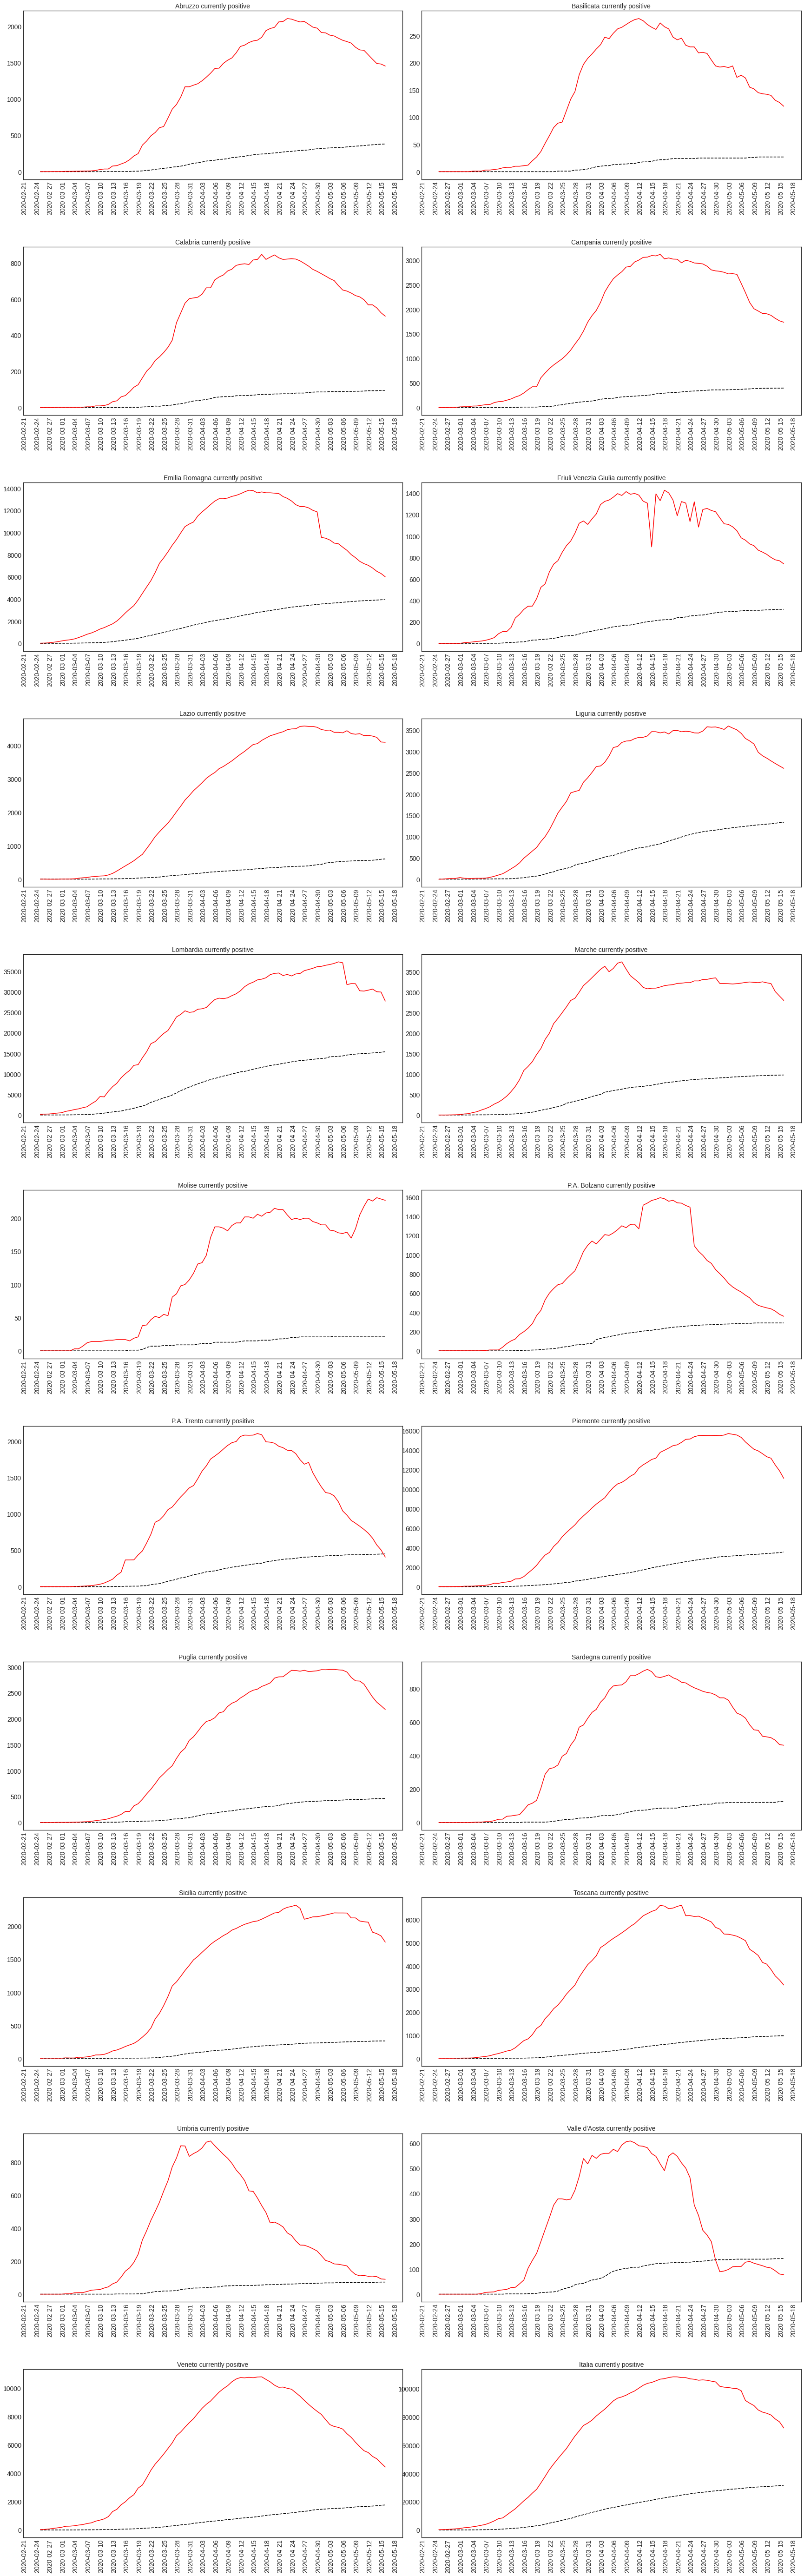

In [22]:
import matplotlib.dates as mdates
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    ax.plot(region_dead.index.values, region_dead.Dead, '--k')
    ax.plot(region_positive.index.values, region_positive['Positive'], '-r')
    ax.set_title(region + ' currently positive', fontsize=14)
    #ax.set_xticklabels(region_positive.index.values,rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    i=i+1


Il numero di positivi assoluto è ancora in aumento in alcune regioni ma vedremo più avanti la sua dipendenza dal numero di tamponi 
 
Segue una comparazione tra regioni relativa al numero di attualmente positivi

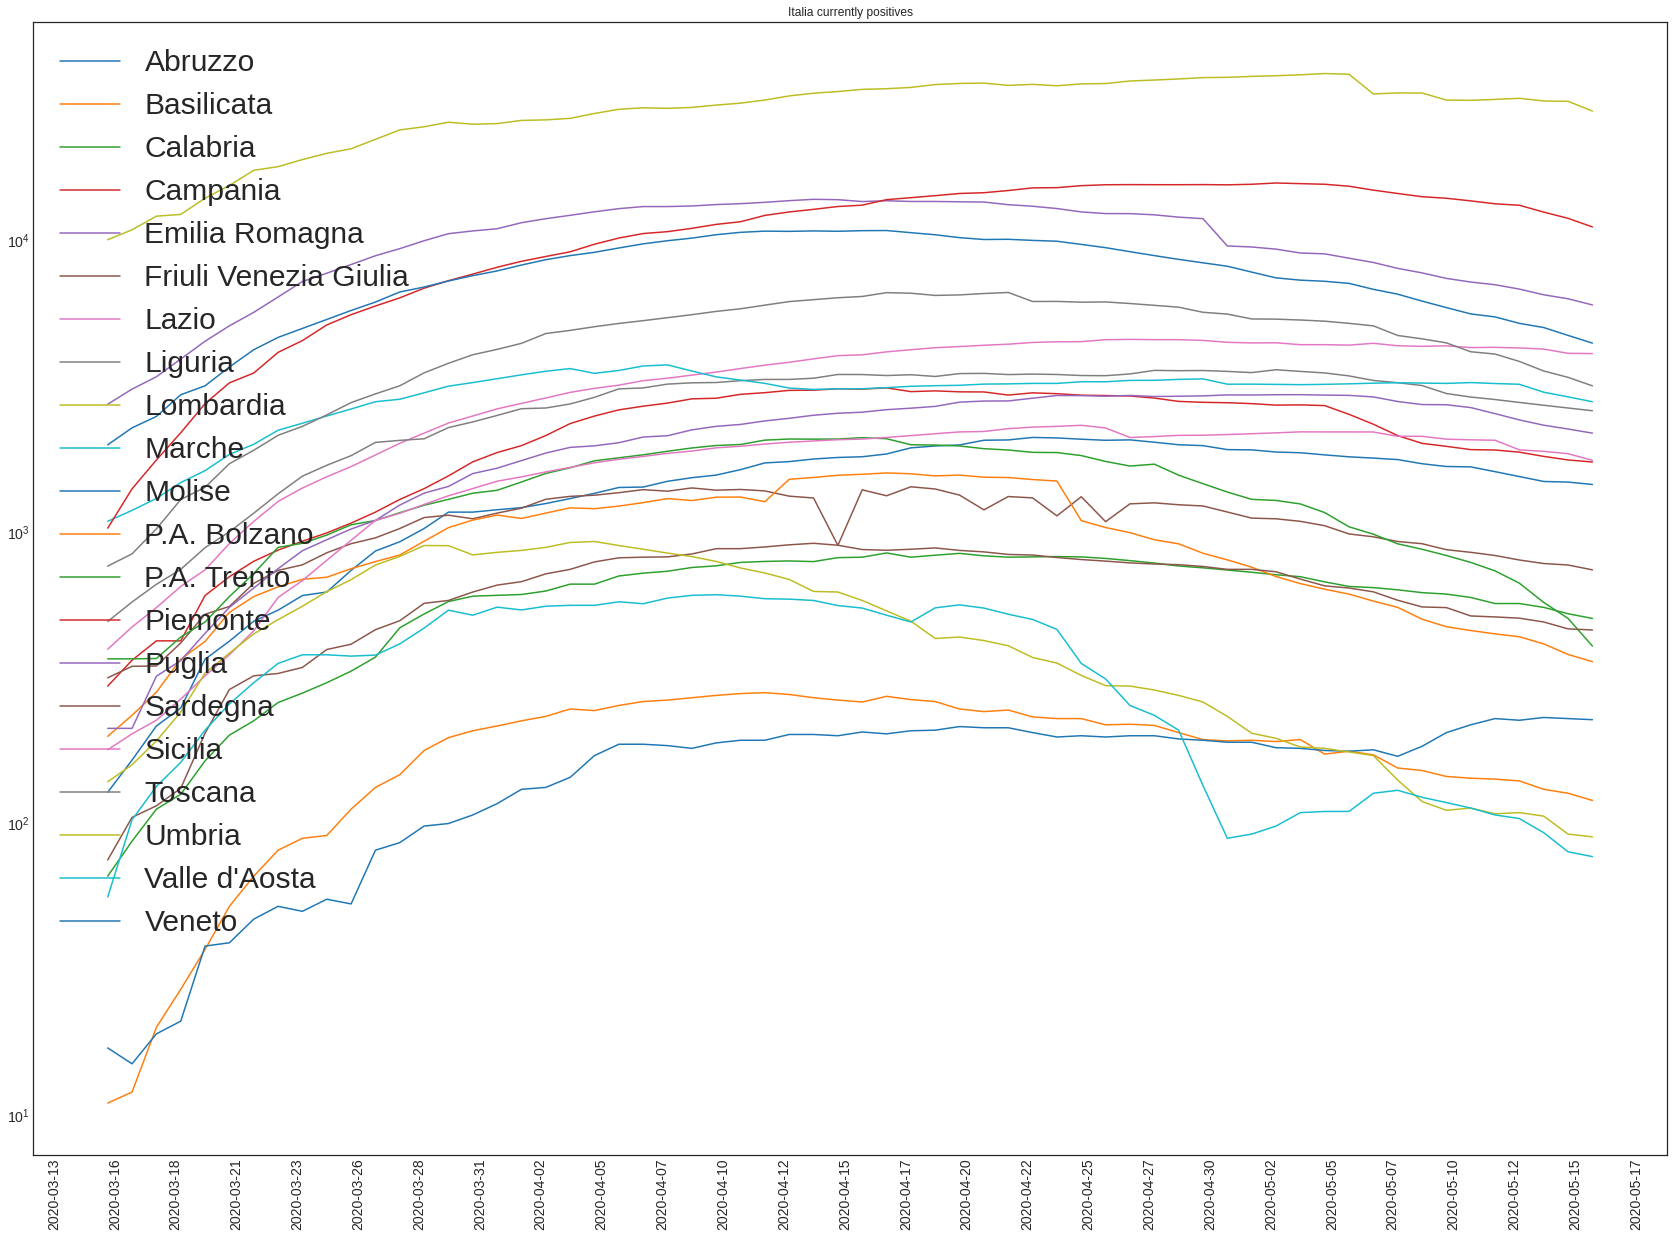

In [79]:
style = dict(size=10, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 20
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    if (region != 'Italia'):
        region_positive = italy_currently_positive[[region]]
        region_positive = region_positive[first_interesting:]
        region_positive.columns = ['Positive']
        ax.plot(region_positive.index.values, region_positive['Positive'], label=region)
        #ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive.loc[last_day, 'Positive'], region, **style)

ax.set_yscale('log')
ax.set_title(region + ' currently positives')
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", prop={'size': 30})


In [75]:
italy_currently_positive.shape[0]

82

Normalizziamo i dati rispetto alla popolazione di ogni regione

In [0]:
 #source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580},
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869},
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131},
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692},
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477},
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220},
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082},
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640},
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574},
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271},
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617},
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406},
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053},
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591},
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891},
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641},
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015},
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666},
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}
            ])

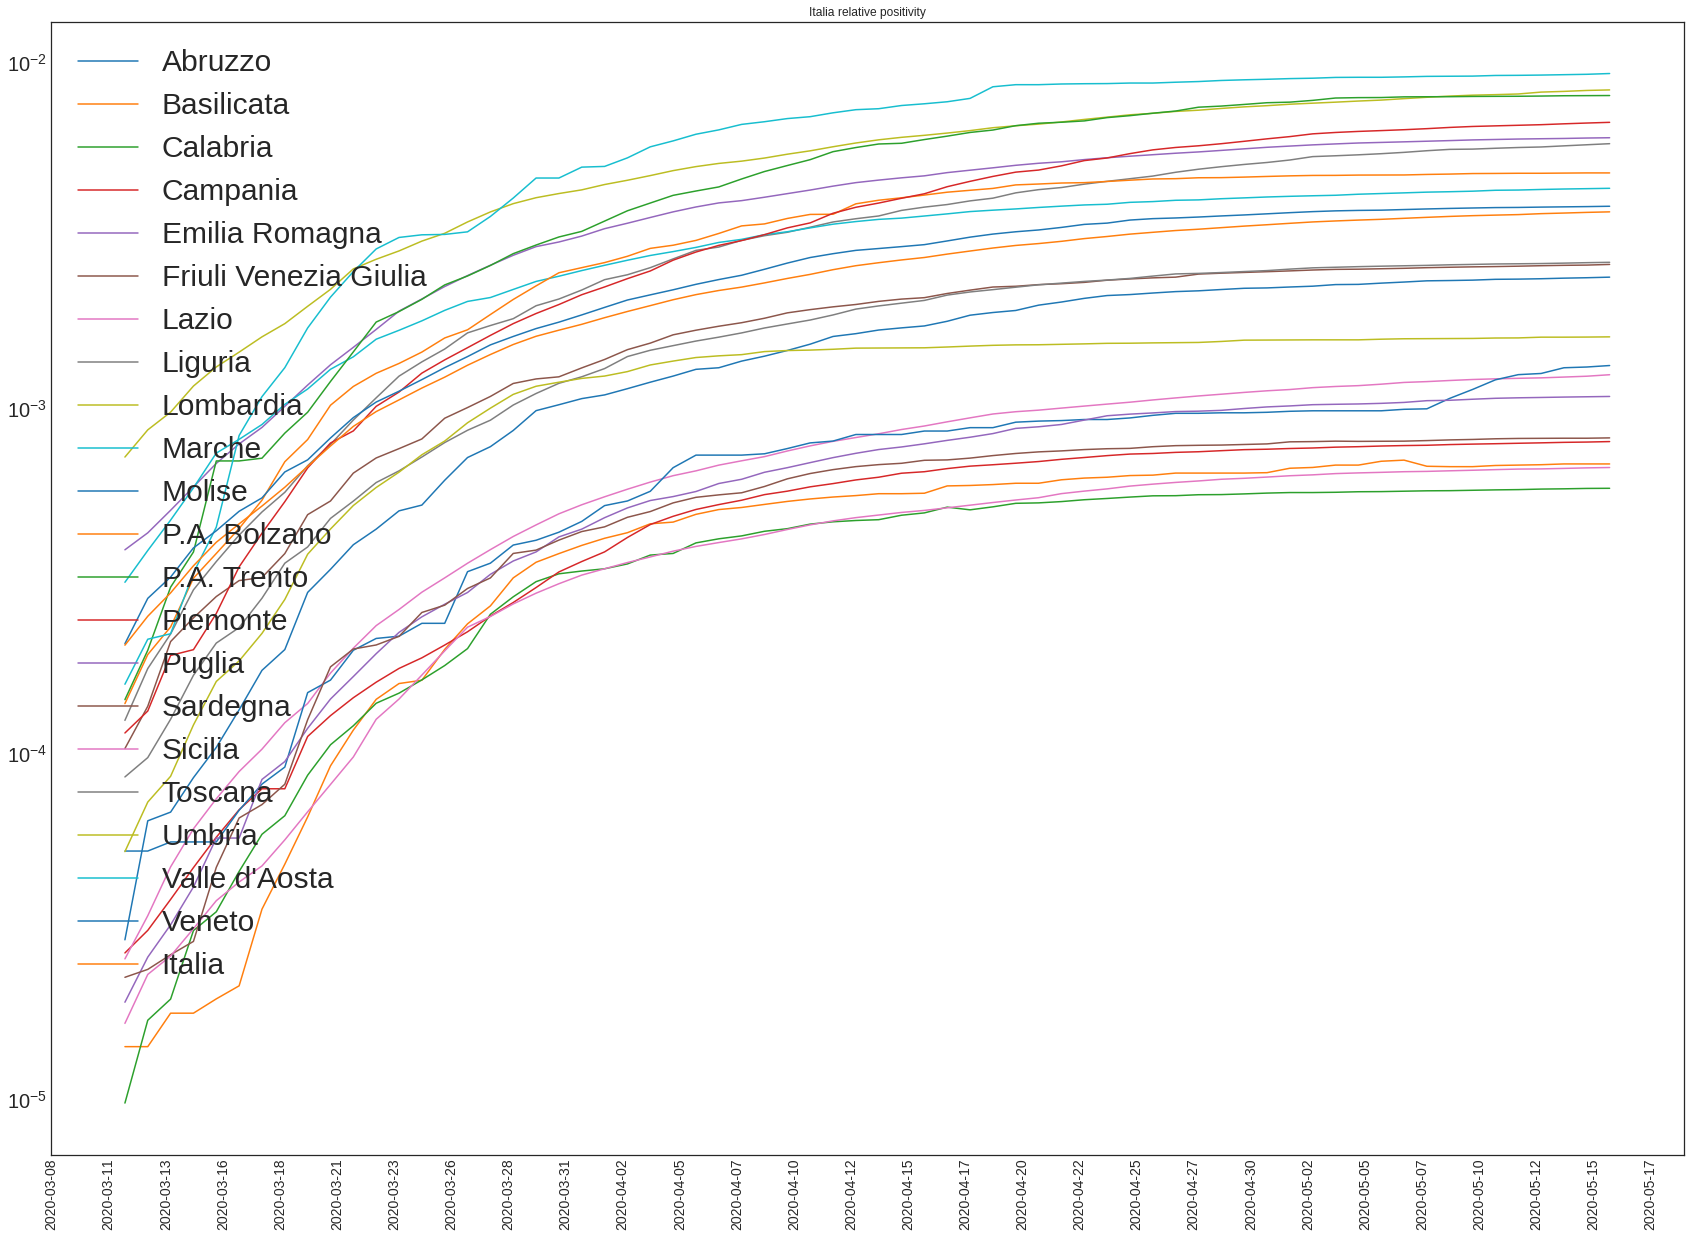

In [80]:
style = dict(size=20, color='gray')
columns = list(italy_total_positive)
last_day = covid['date'].max()
italy_total_positive_normalized = italy_total_positive.copy()
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_relative_positivity = italy_total_positive[region]/population_pivot.loc['population', region]
    region_relative_positivity = region_relative_positivity[first_interesting:]
    ax.plot(region_relative_positivity.index, region_relative_positivity, label=region)
    #ax.text(italy_total_positive.shape[0]-first_interesting-1, region_relative_positivity.loc[last_day], region, **style)
    i=i+1

ax.set_title(region + ' relative positivity')
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})

La Valle d\'Aosta continua ad essere la regione con la maggior densità di contagiati ufficiali

Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


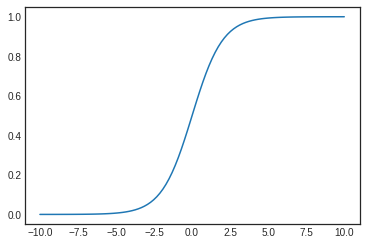

In [26]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... ci si aspetta che quella degli attualmente positivi raggiunga un picco per poi quindi scendere, magari con una discesa più lenta rispetto alla salita, ed infine tendere a zero: 

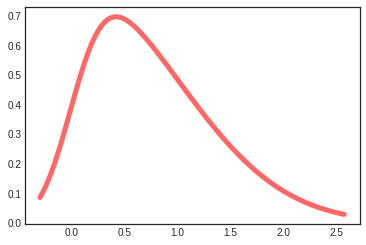

In [27]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

Grazie al lockdown il picco effettivo è stato più basso e più lontano nel tempo rispetto a quello che si sarebbe verificato senza interventi, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Segue una comparazione tra regioni relativa al numero di deceduti, anch'essa rapportata alla popolazione

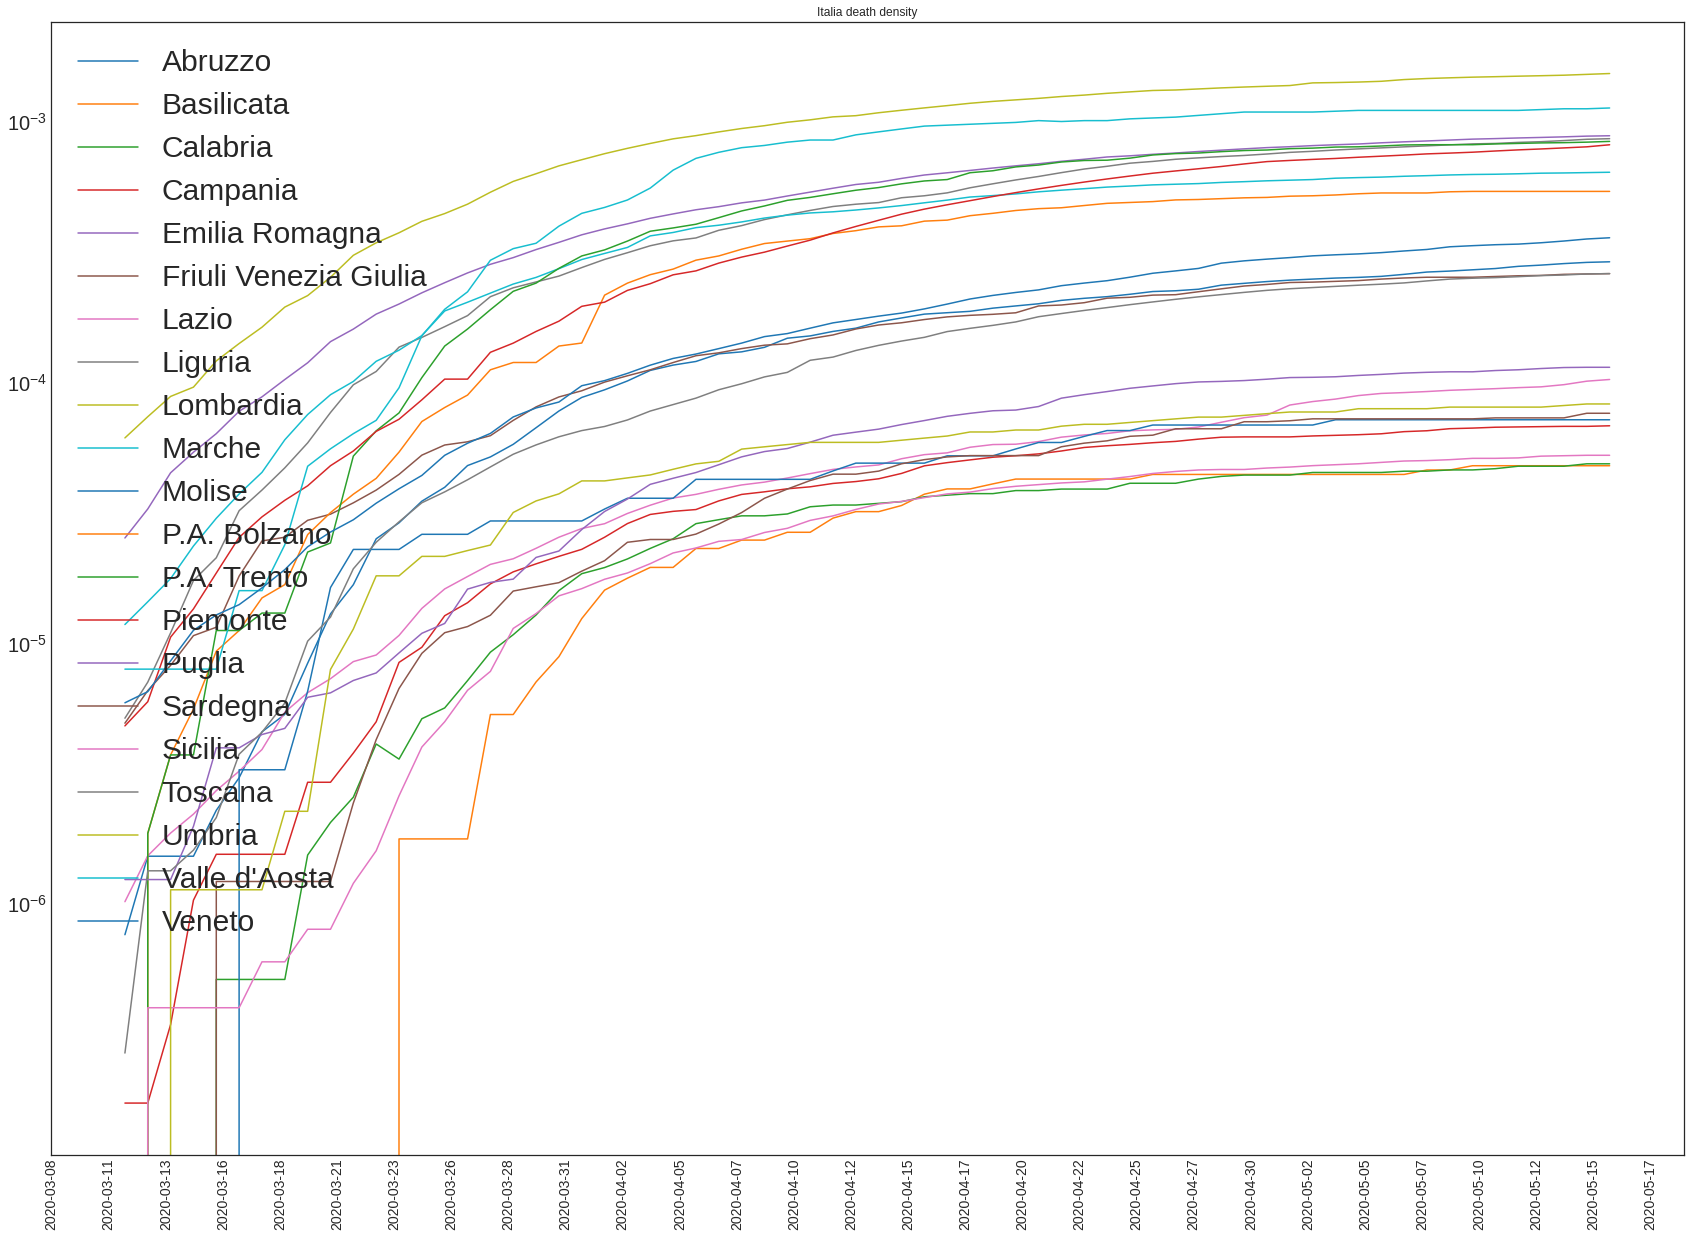

In [81]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_dead = italy_dead[[region]]/population_pivot.loc['population', region]
        region_dead = region_dead[first_interesting:]
        region_dead.columns = ['Dead']
        ax.plot(region_dead.index, region_dead['Dead'], label=region)
        #ax.text(italy_dead.shape[0]-first_interesting-1, region_dead.loc[last_day, 'Dead'], region, **style)
        i=i+1

ax.set_title(region + ' death density')
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Curiosamente si configurano quattro fasce ben distinte. In prima fascia Lombardia e Valle d\'Aosta.
Ricordiamo però le [considerazioni](https://www.repubblica.it/cronaca/2020/04/01/news/istat_dramma_cornavirus_al_nord-252910084/) dell'ISTAT secondo cui il numero di deceduti, soprattutto al Nord, supera di molto la media dello stesso periodo degli anni precedenti e supera la stessa cifra ufficiale indicata dalla Protezione Civile


Nella seguente grafica viene rappresentata l'istantanea del rapporto tra deceduti e totali positivi su tutte le regioni, giorno per giorno, con media mobile a 3 giorni


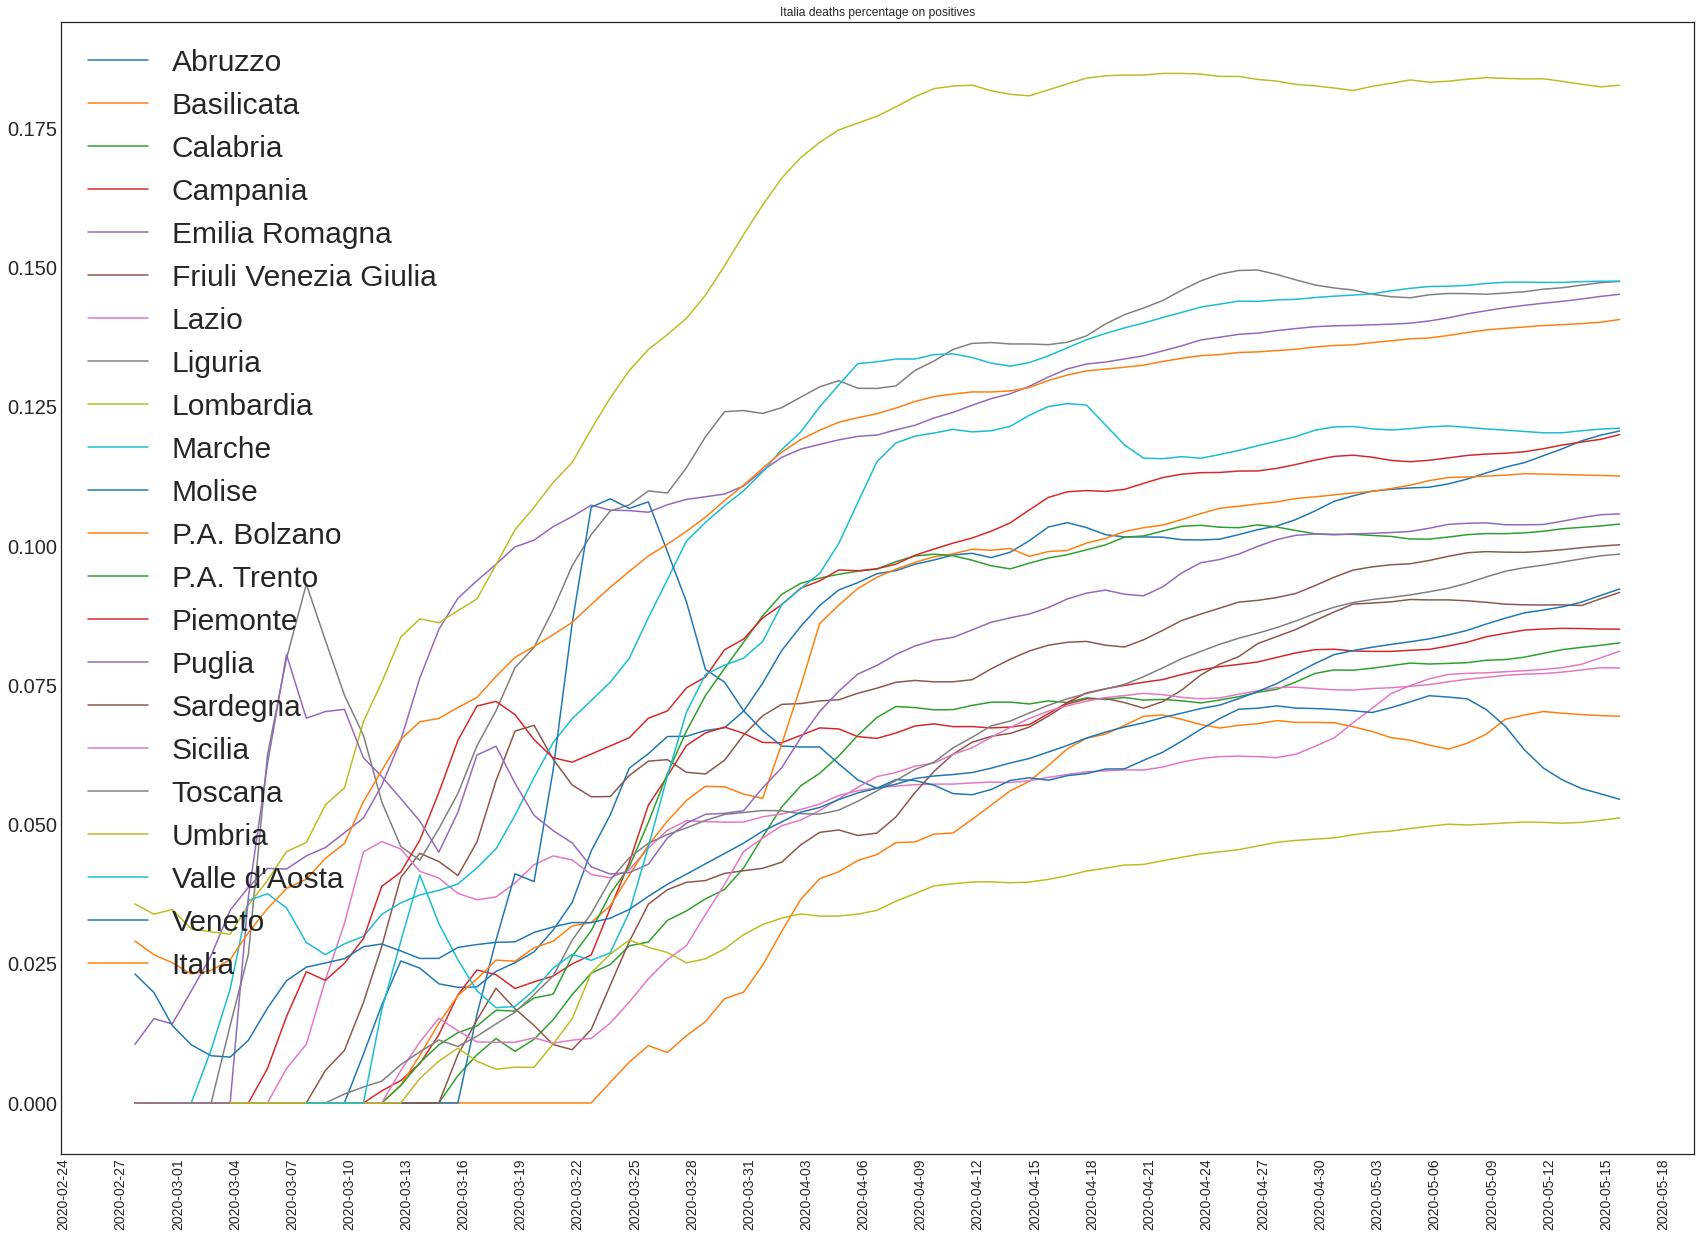

In [83]:
italy_dead_vs_total = italy_dead/italy_total_positive
style = dict(size=20, color='gray')
columns = list(italy_dead_vs_total)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_dead = italy_dead_vs_total[[region]]
    region_dead = region_dead[first_interesting:]
    region_dead.columns = ['Dead_percentage']
    ax.plot(region_dead.index, region_dead['Dead_percentage'].rolling(window=3).mean(), label=region)
    #ax.text(italy_dead_vs_total.shape[0]-first_interesting-1, region_dead.rolling(window=3).mean().loc[last_day, 'Dead_percentage'], region, **style)
    i=i+1

ax.set_title(region + ' deaths percentage on positives')
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})


Anche se i valori reali saranno maggiori, la Lombardia rimane di gran lunga la regione dove il Coronavirus ha ucciso di più. Anche Liguria, Emilia Romagna e Marche sopra la media nazionale.

Si ravvisano differenze anche di un ordine di grandezza tra Umbria (la regione meno "letale") e la Lombardia


Ma l'analisi più interessante è quella del rapporto tra numero di attualmente positivi e numero di tamponi effettuati, dato più realistico in quanto il numero di casi testati è la "popolazione" di riferimento. Un numero o un incremento anomalo del numero di positivi in una regione può essere fuorviante perchè dovuto ad un aumento dei test eseguiti

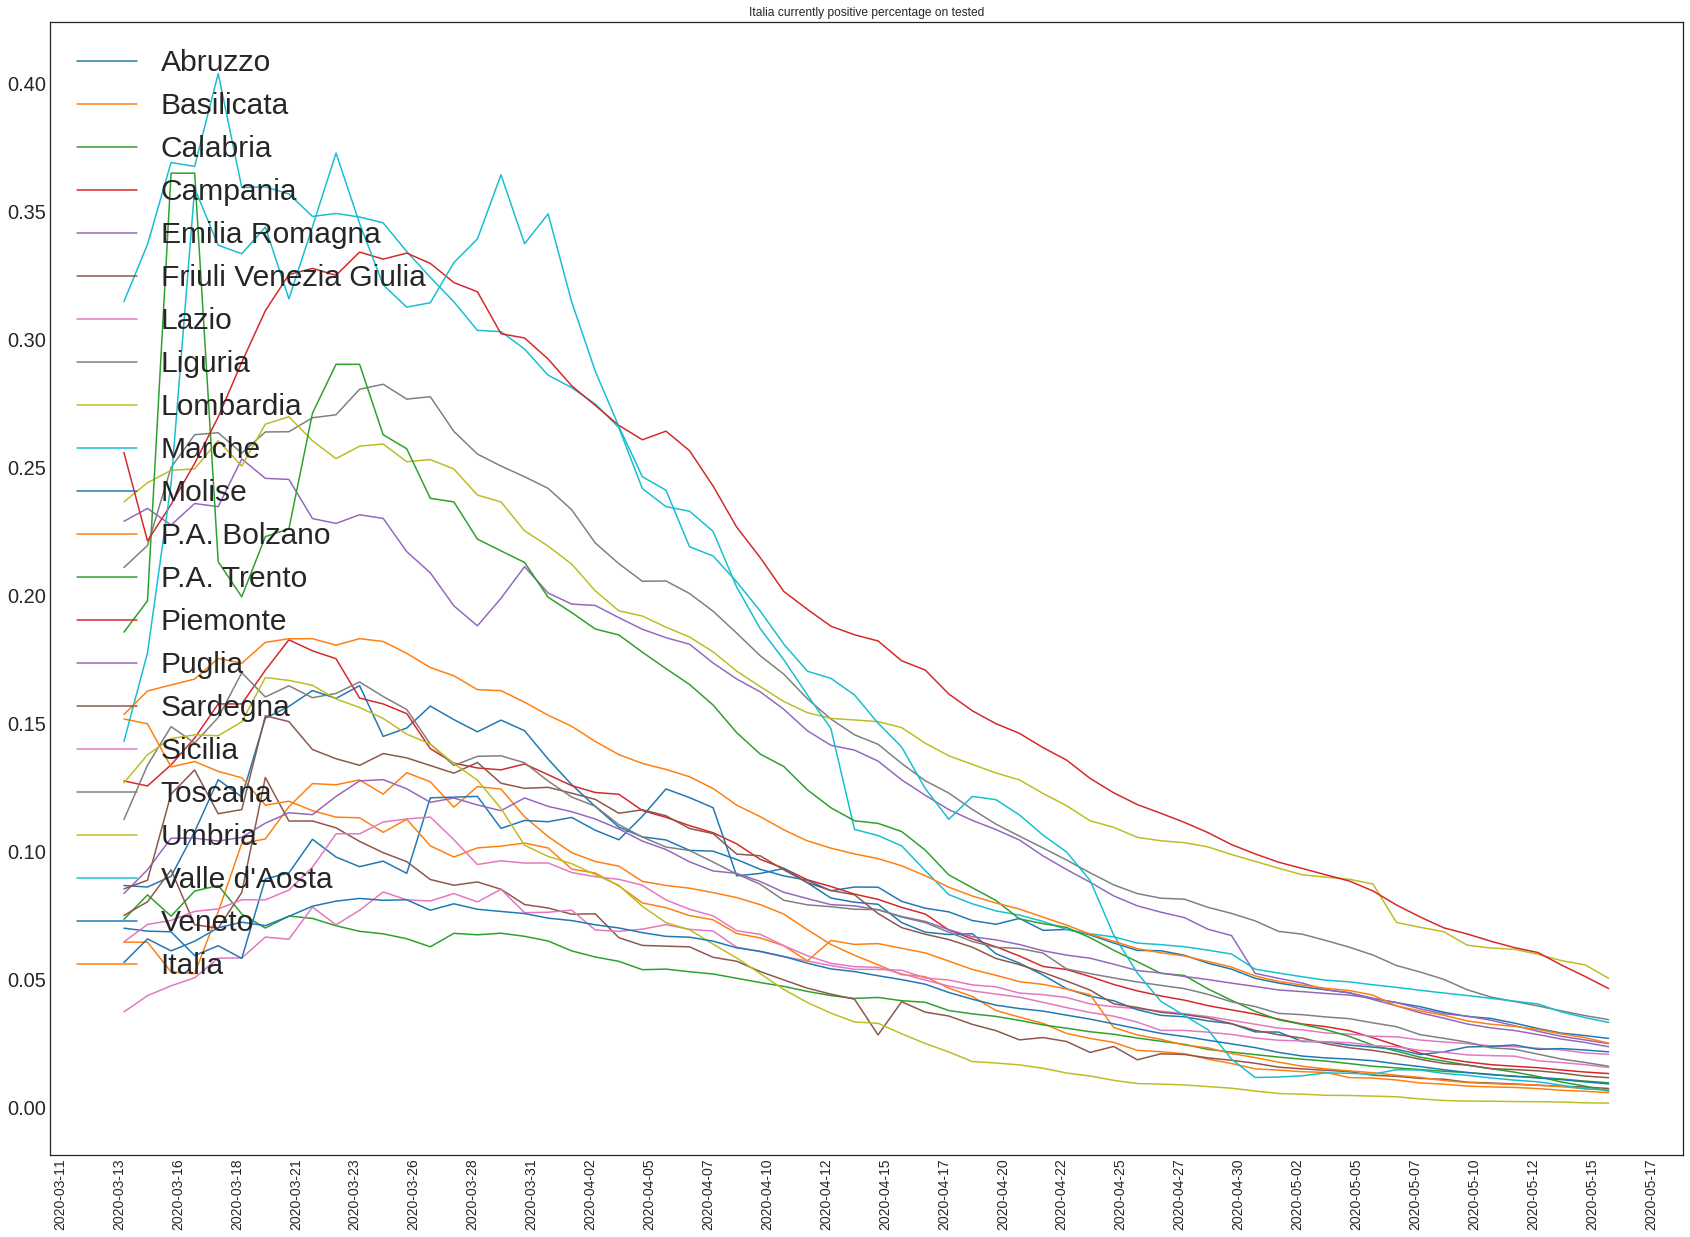

In [84]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 18
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested, label=region)
    #ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive_vs_tested.loc[last_day], region, **style)

ax.set_title(region + ' currently positive percentage on tested')
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Considerando quindi il numero di test eseguiti il picco sembra stato globalmente superato il 24/3. In seguito calo generalizzato, più deciso dove il tasso era più alto. Agli estremi Umbria, con circa lo l'1% di test positivi e la coppia Piemonte-Lombardia con il 10%. Anche la Liguria è decisamente sopra la media. 

Vediamo la dinamica del fenomeno con una media mobile a 4 giorni, dal momento che i dati grezzi mostrano un'oscillazione con periodo giornaliero.


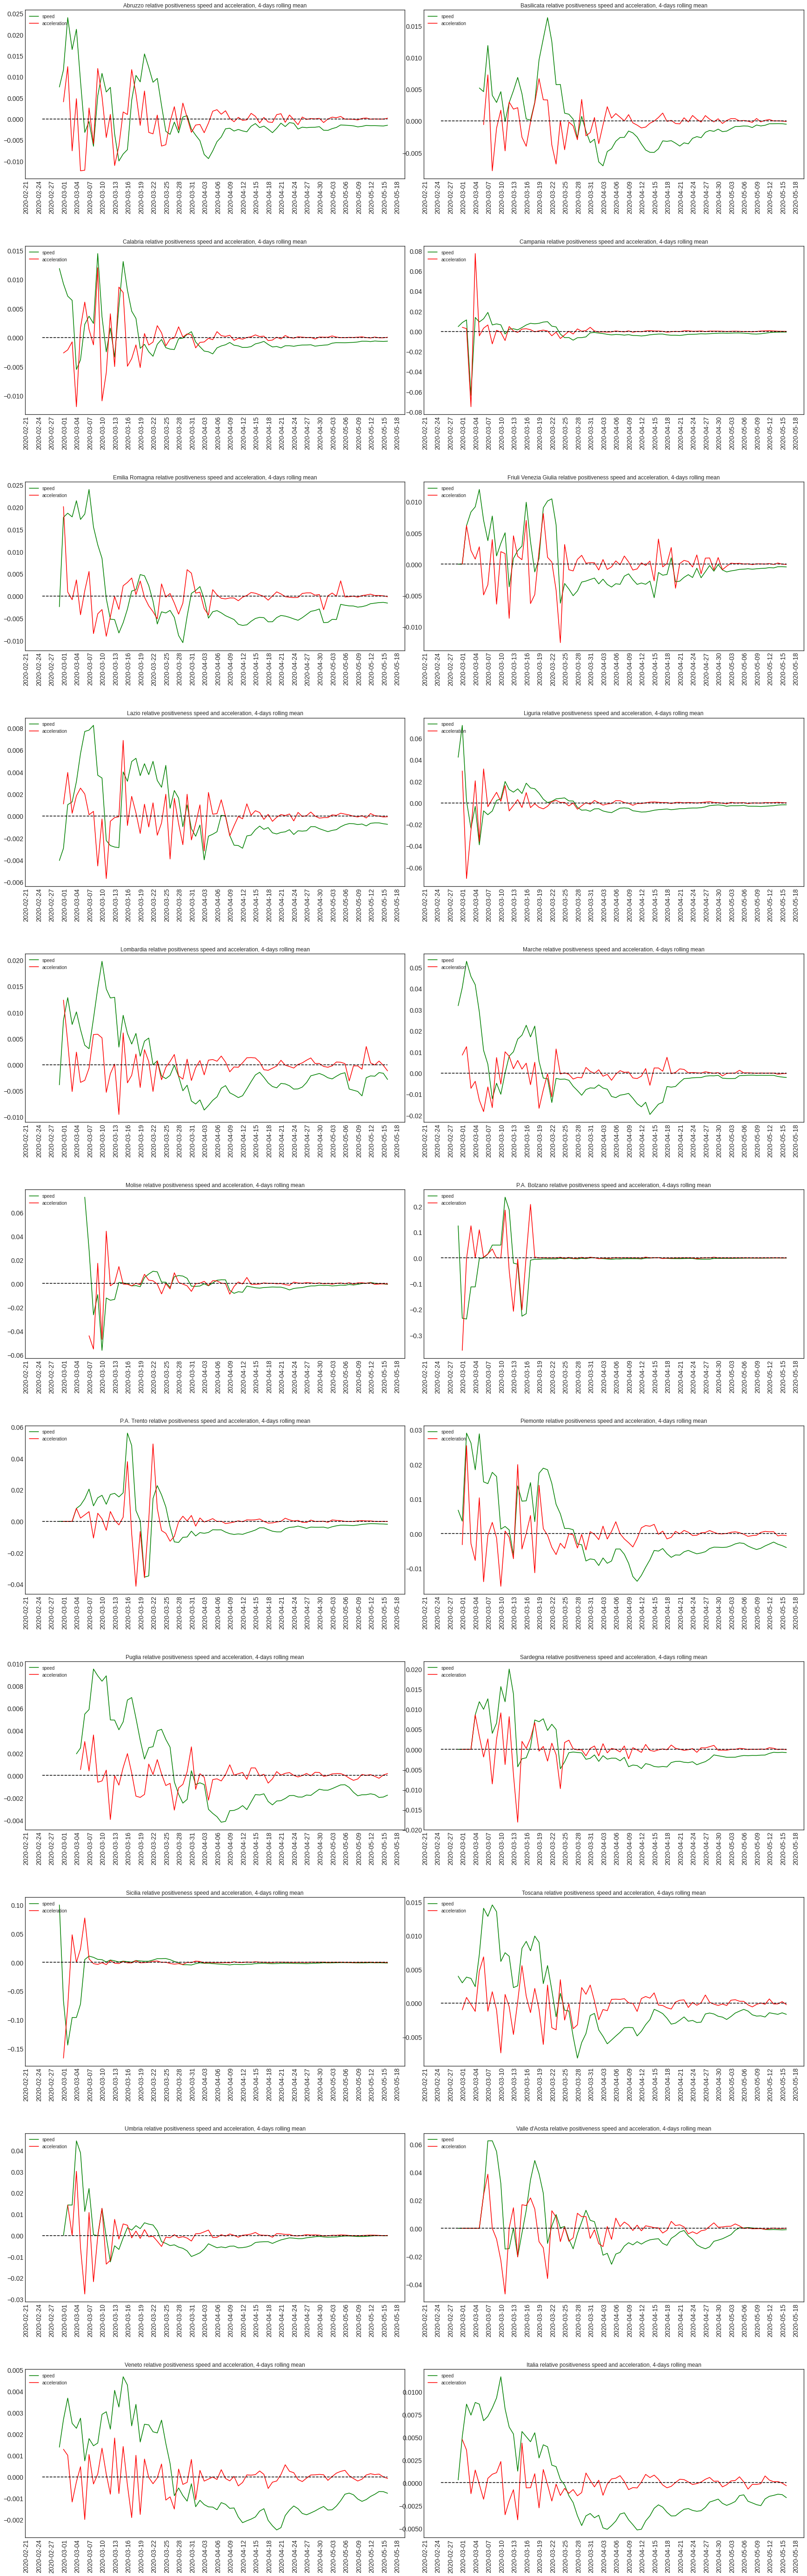

In [32]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested.columns = ['Positive']
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff(), '-g', label='speed')
    ax.set_title(region + ' currently positive delta', fontsize=14)
#    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff().diff(), '-r', label='acceleration')
    ax.plot(region_positive_vs_tested.index, np.zeros(region_positive_vs_tested.index.size), '--k')
    ax.set_title(region + ' relative positiveness speed and acceleration, 4-days rolling mean')
#    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


Discesa non marcata ma costante ovunque, occhio alla Lombardia dove si è verificata una piccola inversione di tendenza

In [33]:
italy_cumulative_positive_vs_tested = italy_currently_positive/italy_tested
italy_cumulative_positive_vs_tested.loc[last_day].sort_values(ascending=False)

denominazione_regione
Lombardia                0.050410
Piemonte                 0.046399
Liguria                  0.034245
Marche                   0.033135
Abruzzo                  0.026912
Italia                   0.025062
Puglia                   0.024873
Emilia Romagna           0.023673
Molise                   0.021685
Lazio                    0.020688
Toscana                  0.016051
Sicilia                  0.015585
Campania                 0.013197
Sardegna                 0.011570
Calabria                 0.009582
Veneto                   0.009159
Friuli Venezia Giulia    0.007380
P.A. Bolzano             0.006781
Valle d'Aosta            0.006747
P.A. Trento              0.006374
Basilicata               0.005755
Umbria                   0.001673
Name: 2020-05-15 17:00:00, dtype: float64

Visti i dati cumulativi vediamo quelli istantanei

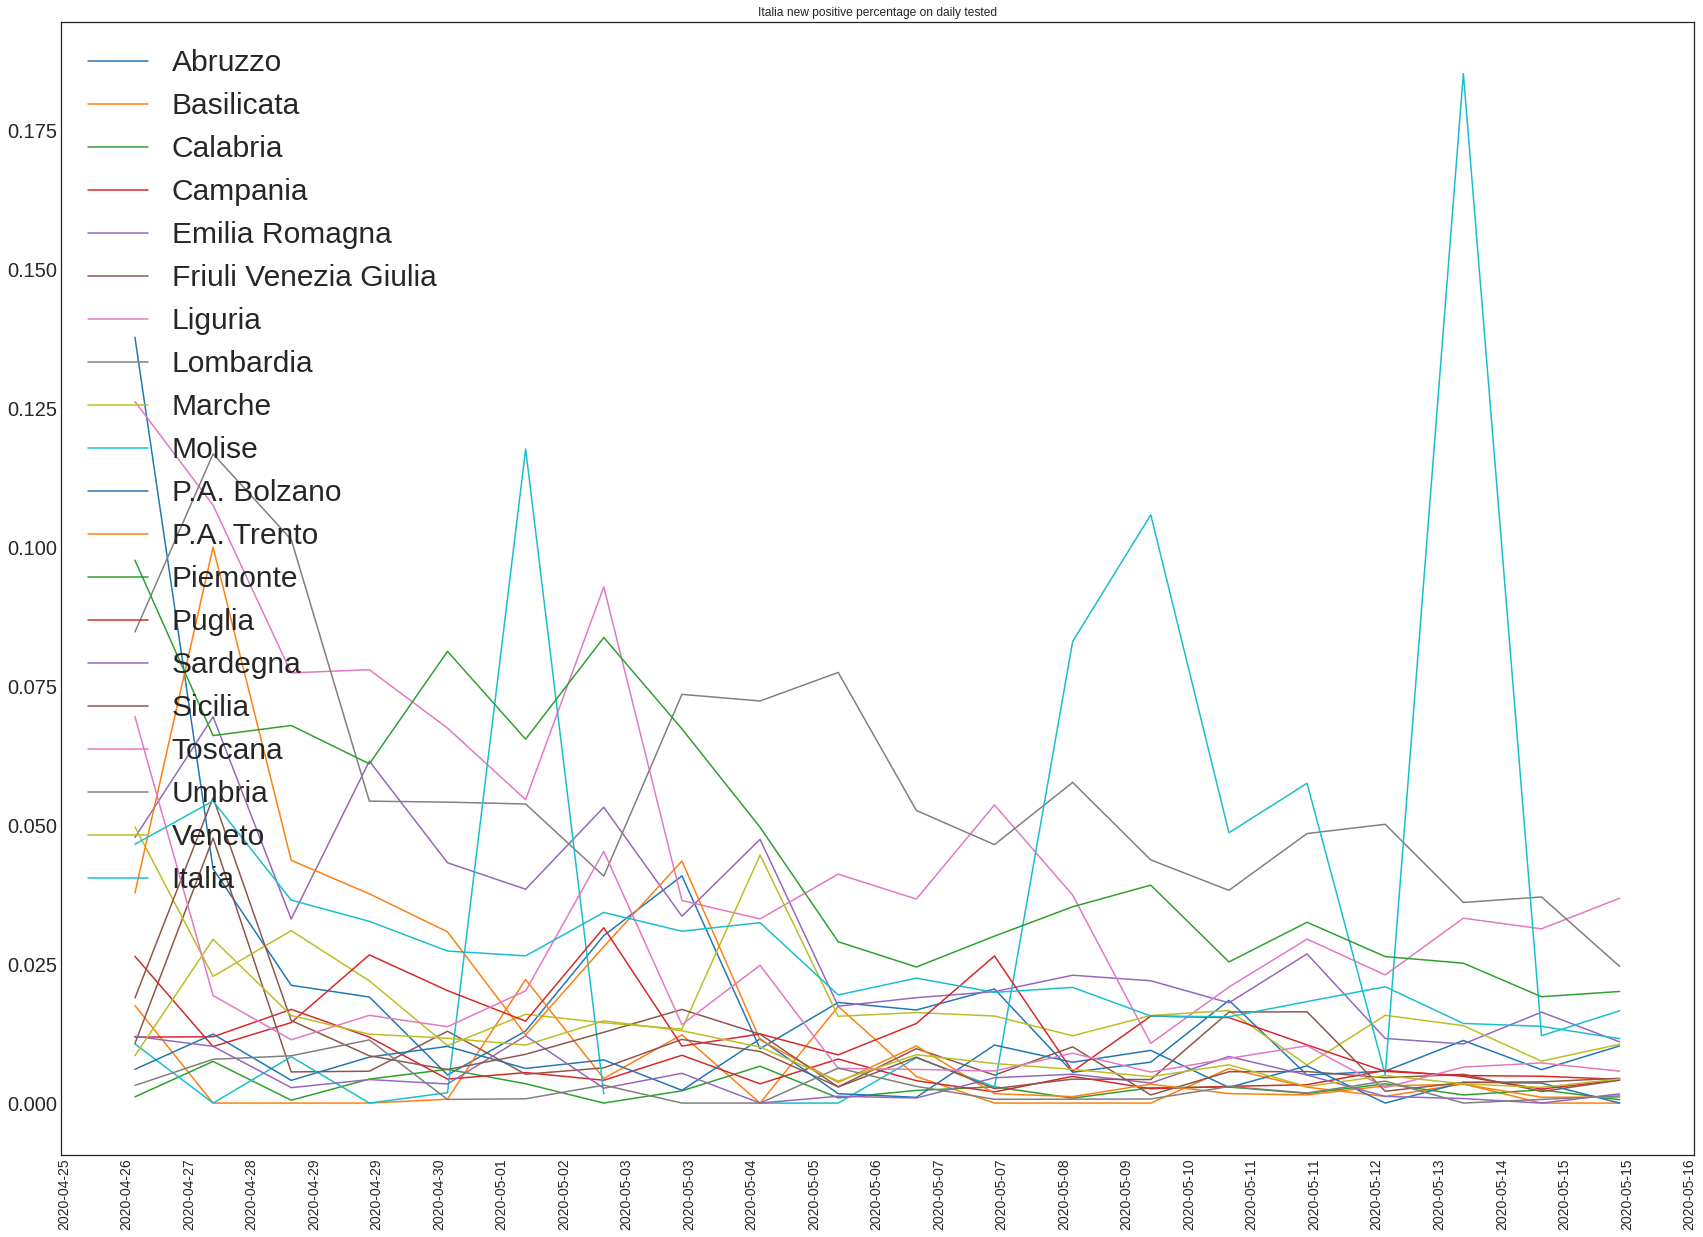

In [86]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 62
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
  if (region!='Valle d\'Aosta') and (region!='Lazio'):
        region_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
        region_positive_vs_tested = region_positive_vs_tested[first_interesting:].clip(0, 0.3)
        ax.plot(region_positive_vs_tested.index, region_positive_vs_tested, label=region)
        #ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.loc[last_day], region, **style)

ax.set_title(region + ' new positive percentage on daily tested')
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Oggi la Liguria è stata la regione col maggior numero di positivi in rapporto al numero di tamponi eseguiti.



Vediamo anche il dato splittato regione per regione

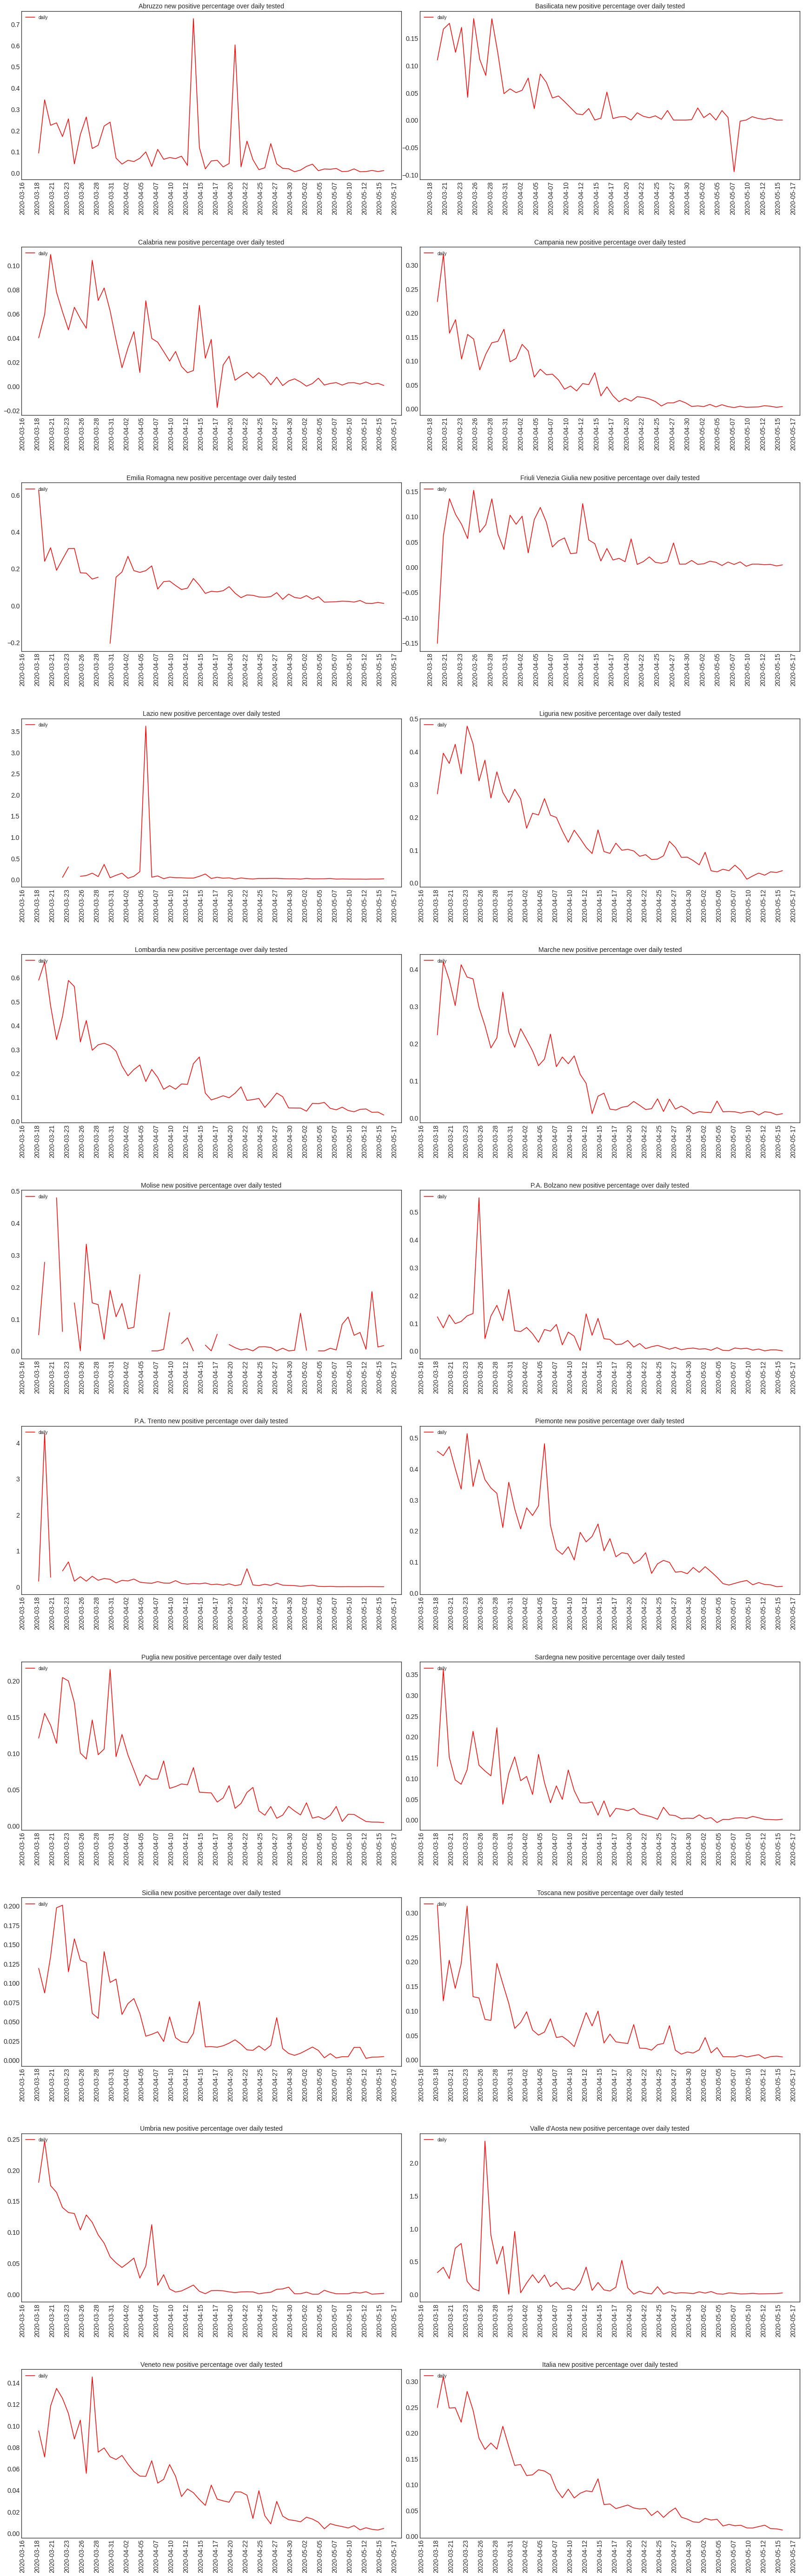

In [35]:
columns = list(italy_tested)
i=1
first_interesting = 23
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_new_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
    region_new_positive_vs_tested.columns = ['Positive_perc']
    region_new_positive_vs_tested = region_new_positive_vs_tested[first_interesting:]
    ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'], '-r', label='daily')
    #ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' new positive percentage over daily tested', fontsize=14)
    #ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


Piccoli aumenti in alcune regioni fanno sì che per oggi il trend nazionale fermi la sua discesa

In [36]:
italy_tested['Liguria'].diff().loc[last_day]

1764.0

In [37]:
italy_new_positive['Liguria'].loc[last_day]

65

**Quanti positivi ci sono in totale?**

Studiamo il caso del Veneto e generalizziamolo

In [38]:
veneto_positive_vs_tested = italy_new_positive['Veneto']/italy_tested['Veneto'].diff()
veneto_positive_vs_tested.rolling(window=5).mean()

date
2020-02-24 18:00:00         NaN
2020-02-25 18:00:00         NaN
2020-02-26 18:00:00         NaN
2020-02-27 18:00:00         NaN
2020-02-28 18:00:00         NaN
                         ...   
2020-05-11 17:00:00    0.005555
2020-05-12 17:00:00    0.005122
2020-05-13 17:00:00    0.004603
2020-05-14 17:00:00    0.004218
2020-05-15 17:00:00    0.003708
Name: Veneto, Length: 82, dtype: float64

In [39]:
italy_tested['Veneto']

date
2020-02-24 18:00:00      2200
2020-02-25 18:00:00      3780
2020-02-26 18:00:00      4900
2020-02-27 18:00:00      6164
2020-02-28 18:00:00      7414
                        ...  
2020-05-11 17:00:00    445905
2020-05-12 17:00:00    454189
2020-05-13 17:00:00    463154
2020-05-14 17:00:00    474488
2020-05-15 17:00:00    484639
Name: Veneto, Length: 82, dtype: int64

In [40]:
italy_new_tested = italy_tested.diff()
italy_positive_vs_tested = italy_new_positive/italy_new_tested
italy_positive_vs_tested.loc[last_day].sort_values(ascending=False)

denominazione_regione
Liguria                  0.036848
Lombardia                0.024585
Piemonte                 0.020073
Valle d'Aosta            0.019169
Molise                   0.016598
Lazio                    0.015592
Italia                   0.011573
Emilia Romagna           0.011007
Marche                   0.010589
Abruzzo                  0.010274
Toscana                  0.005738
Sicilia                  0.004464
Veneto                   0.004335
Puglia                   0.004265
Campania                 0.004160
Friuli Venezia Giulia    0.004118
Sardegna                 0.001657
Umbria                   0.001287
P.A. Trento              0.001050
Calabria                 0.000606
P.A. Bolzano             0.000000
Basilicata               0.000000
Name: 2020-05-15 17:00:00, dtype: float64

[L'esperimento di Vò Euganeo](https://mattinopadova.gelocal.it/regione/2020/03/07/news/coronavirus-i-risultati-dei-2778-tamponi-a-vo-positivo-il-2-5-1.38563019) ha rilevato che su 2778 tamponi eseguiti a tappeto sulla popolazione del comune, in massima parte eseguiti tra il 25 ed il 29 febbraio, il 2,5% è risultato positivo. 

In tutto il Veneto, fino al giorno 29/2, sono stati totalmente eseguiti 8659 test (tolti quelli di Vò si tratta di test mirati e non a tappeto) e la percentuale di attualmente positivi (media mobile a 5 giorni) viene confermata al 2.5%.

Ipotizziamo allora che la media a 5 giorni del rapporto tra i valori giornalieri dei nuovi positivi e dei test effettuati possa essere utilizzata come stima della percentuale di contagiati totali di una popolazione.

Generalizzando questo esperimento, purtroppo isolato, si può sommariamente stimare che, ipotizzando valido il dato del 29/2 e quindi anche i successivi, la percentuale di contagiati in Veneto all'ultima rilevazione sia dello 0.4%.

Generalizzando ulteriormente, per l'ultima rilevazione e in una media mobile di 5 giorni, i dati sono quelli visualizzati nel precedente grafico e, nel dettaglio:

In [41]:
italy_positive_vs_tested.rolling(window=5).mean().loc[last_day].sort_values(ascending=False)

denominazione_regione
Molise                   0.055300
Lombardia                0.039273
Liguria                  0.030796
Piemonte                 0.024647
Italia                   0.015778
Emilia Romagna           0.015288
Marche                   0.010934
Lazio                    0.010135
Valle d'Aosta            0.009355
Abruzzo                  0.007665
Toscana                  0.006504
Sicilia                  0.006104
Puglia                   0.006042
Friuli Venezia Giulia    0.004320
Campania                 0.004138
Veneto                   0.003708
P.A. Bolzano             0.002809
P.A. Trento              0.002011
Calabria                 0.001928
Sardegna                 0.001741
Umbria                   0.001541
Basilicata               0.001503
Name: 2020-05-15 17:00:00, dtype: float64

In Italia, quindi, estendendo il caso Veneto, il 1.9% della popolazione sarebbe oggi contagiato (in Molise, Lombardia, Liguria e Piemonte la percentuale supera il 3%). E' assodato che il numero di contagi sia molto maggiore di quello registrato: si segnala lo [studio dell'Imperial College](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Europe-estimates-and-NPI-impact-30-03-2020.pdf) secondo il quale la percentuale sarebbe, al 30 marzo, del 9.8%, dato di poco inferiore alla nostra stima in quel giorno.

[Altri studi](https://www.repubblica.it/cronaca/2020/04/06/news/coronavirus-253286203/?ref=RHPPLF-BH-I253289448-C8-P3-S1.8-T1) di inizio aprile ipotizzano 5-6 milioni di contagiati a quella data, confermando quindi l'ordine di grandezza del 10%

Vediamo l'andamento di questa curva

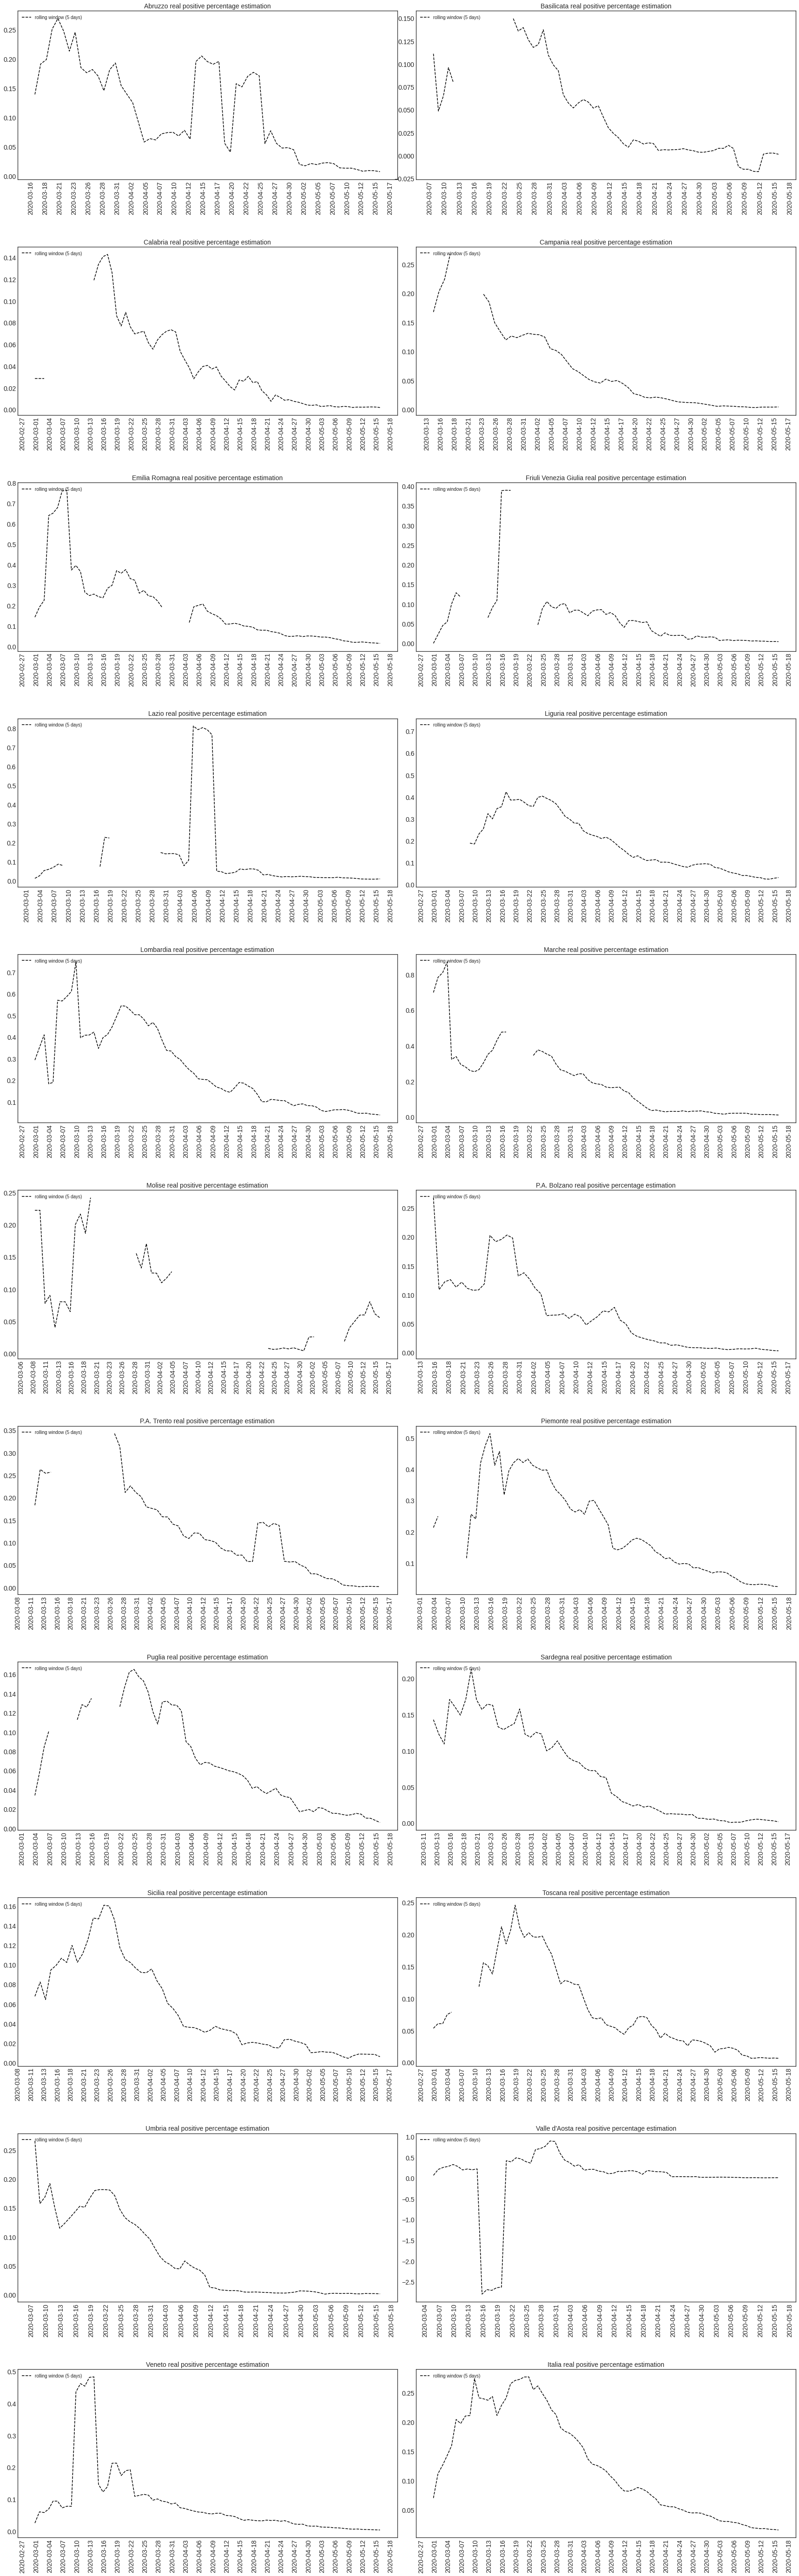

In [42]:
columns = list(italy_tested)
i=1
#first_interesting = 0
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive_vs_tested = italy_positive_vs_tested[[region]]
    #region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    region_positive_vs_tested.columns = ['tested']
    #region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    #ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['tested'], '-r', label='daily')
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['tested'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' real positive percentage estimation', fontsize=14)
    #ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="upper left", prop={'size': 10})
    i=i+1

Diamo anche un'occhiata all'andamento dei test

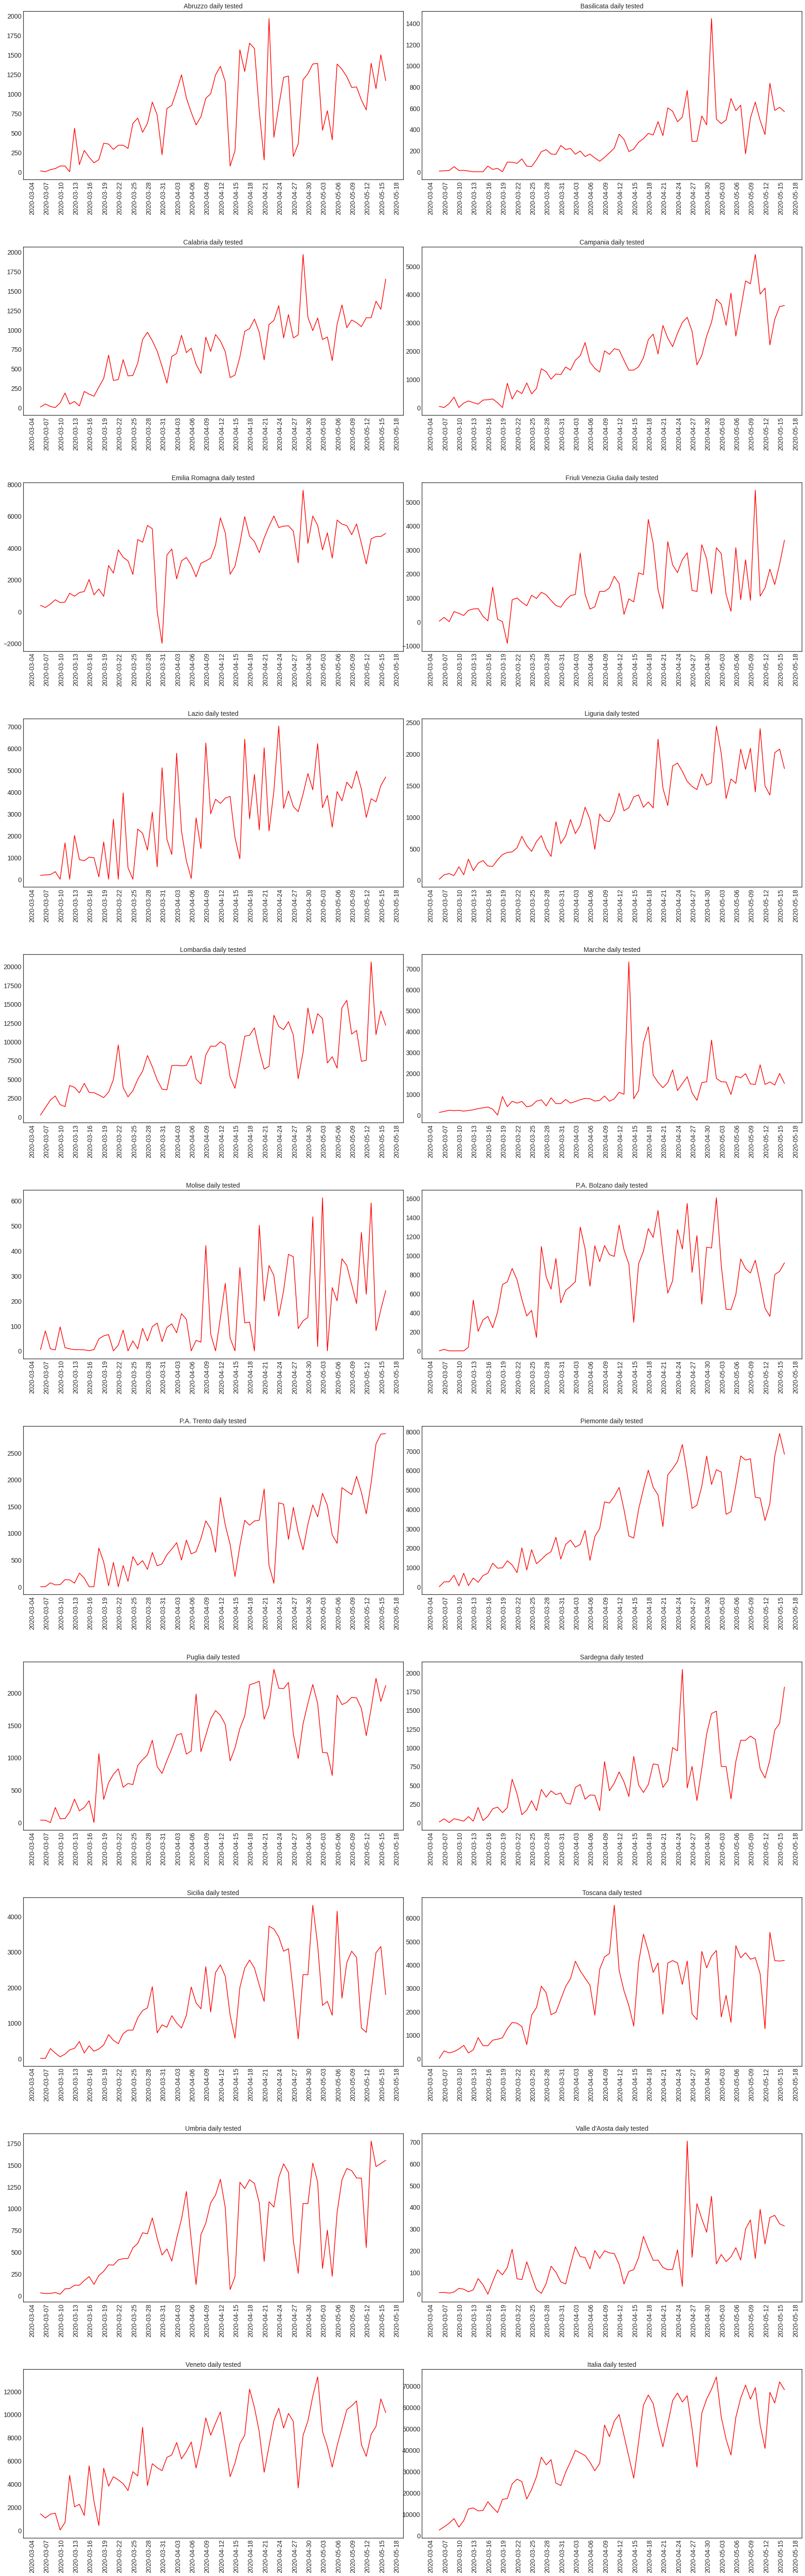

In [43]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_daily_tested = italy_tested[[region]].diff()
    region_daily_tested.columns = ['tested']
    region_daily_tested = region_daily_tested[10:]
    ax.plot(region_daily_tested.index, region_daily_tested['tested'], '-r', label='daily')
    ax.set_title(region + ' daily tested', fontsize=14)
    #ax.set_xticklabels(region_daily_tested.index,rotation=90)
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    i=i+1


Il numero di test è determinante nel far salire o scendere il numero assoluto di contagi registrati. Tendenzialmente il numero di test eseguiti al giorno  sale ma in modo oscillatorio.

Vediamo infine la relazione tra positivi relativi (ossia rapportato al numero di test), ospedalizzati e deceduti

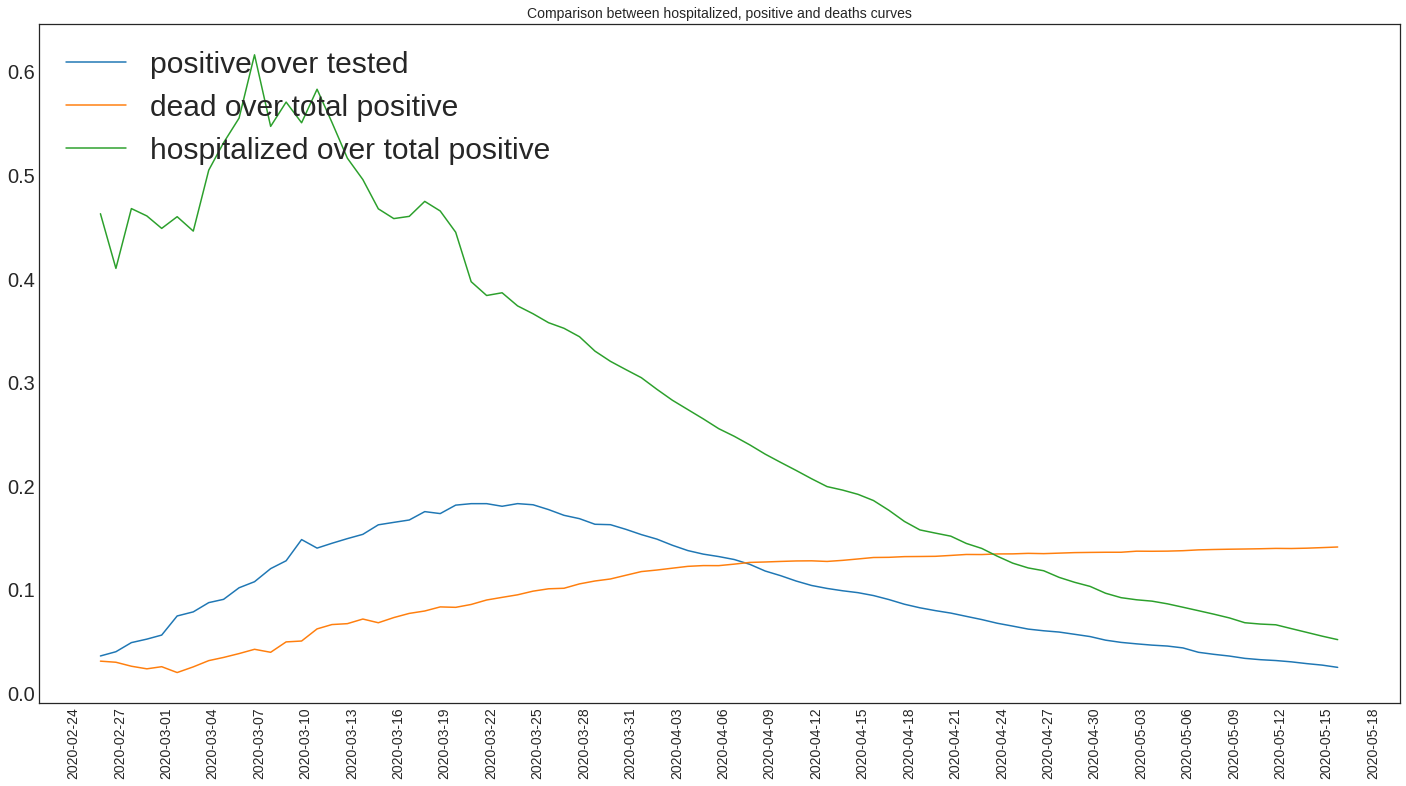

In [47]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
italy_hospitalized_vs_totalpositives = italy_hospitalized[['Italia']]/italy_total_positive[['Italia']]
italy_hospitalized_vs_totalpositives = italy_hospitalized_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested, label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives, label='dead over total positive')
ax.plot(italy_hospitalized_vs_totalpositives.index, italy_hospitalized_vs_totalpositives, label='hospitalized over total positive')
#ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.rolling(window=5).mean().loc[last_day], region, **style)

ax.set_title('Comparison between hospitalized, positive and deaths curves', fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

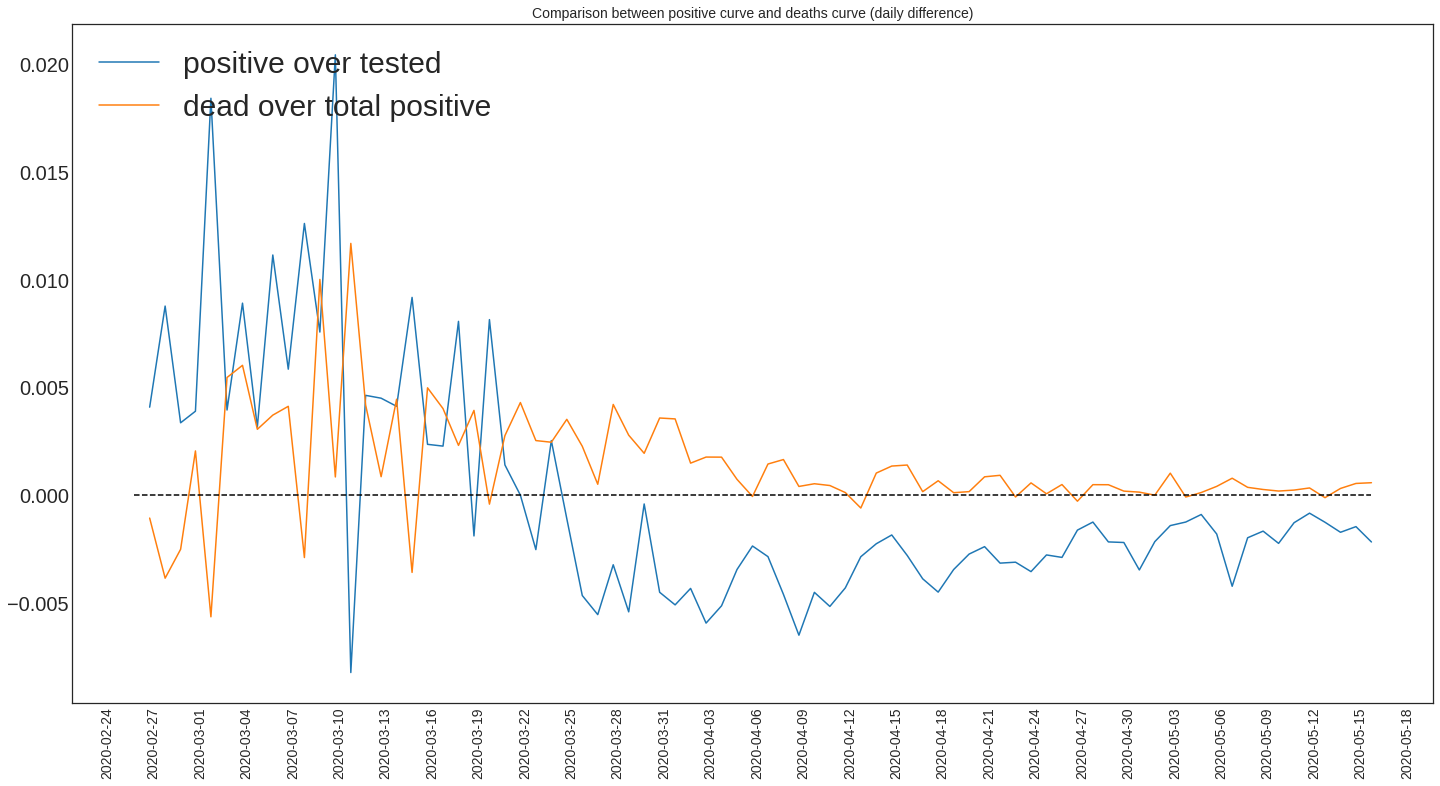

In [49]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested.diff(), label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives.diff(), label='dead over total positive')
ax.plot(italy_dead_vs_totalpositives.index, np.zeros(italy_dead_vs_totalpositives.index.size), '--k')

ax.set_title('Comparison between positive curve and deaths curve (daily difference)', fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune='both'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

La curva dei deceduti è per logica in ritardo rispetto al tasso di positivi.
La derivata dei positivi ha sfondato quota zero il 24/3, quella dei nuovi deceduti non ha ancora sfondato quota 0. Un ritardo di 52 giorni decisamente anomalo... probabilmente a causa della confusione nel calcolo dei deceduti, sia sui criteri, sia sui tempi
